Found 65340 images belonging to 2 classes.
Found 16335 images belonging to 2 classes.
Epoch 1/10
8167/8167 [==============================] - ETA: 0s - loss: 0.1654 - accuracy: 0.9379
Epoch 1: val_loss improved from inf to 0.17269, saving model to D:\Davies Ningthoujam\My project\Ml Project\Driver drowsiness Detection\models


INFO:tensorflow:Assets written to: D:\Davies Ningthoujam\My project\Ml Project\Driver drowsiness Detection\models\assets


INFO:tensorflow:Assets written to: D:\Davies Ningthoujam\My project\Ml Project\Driver drowsiness Detection\models\assets


8167/8167 [==============================] - 4216s 516ms/step - loss: 0.1654 - accuracy: 0.9379 - val_loss: 0.1727 - val_accuracy: 0.9350 - lr: 0.0010
Epoch 2/10
8167/8167 [==============================] - ETA: 0s - loss: 0.1609 - accuracy: 0.9386
Epoch 2: val_loss improved from 0.17269 to 0.17096, saving model to D:\Davies Ningthoujam\My project\Ml Project\Driver drowsiness Detection\models


INFO:tensorflow:Assets written to: D:\Davies Ningthoujam\My project\Ml Project\Driver drowsiness Detection\models\assets


INFO:tensorflow:Assets written to: D:\Davies Ningthoujam\My project\Ml Project\Driver drowsiness Detection\models\assets


8167/8167 [==============================] - 2810s 344ms/step - loss: 0.1609 - accuracy: 0.9386 - val_loss: 0.1710 - val_accuracy: 0.9345 - lr: 0.0010
Epoch 3/10
8167/8167 [==============================] - ETA: 0s - loss: 0.1571 - accuracy: 0.9398
Epoch 3: val_loss did not improve from 0.17096
8167/8167 [==============================] - 6868s 841ms/step - loss: 0.1571 - accuracy: 0.9398 - val_loss: 0.1921 - val_accuracy: 0.9323 - lr: 0.0010
Epoch 4/10
8167/8167 [==============================] - ETA: 0s - loss: 0.1565 - accuracy: 0.9417
Epoch 4: val_loss did not improve from 0.17096
8167/8167 [==============================] - 2976s 364ms/step - loss: 0.1565 - accuracy: 0.9417 - val_loss: 0.1865 - val_accuracy: 0.9323 - lr: 0.0010
Epoch 5/10
8167/8167 [==============================] - ETA: 0s - loss: 0.1559 - accuracy: 0.9412
Epoch 5: val_loss did not improve from 0.17096

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
8167/8167 [=======================

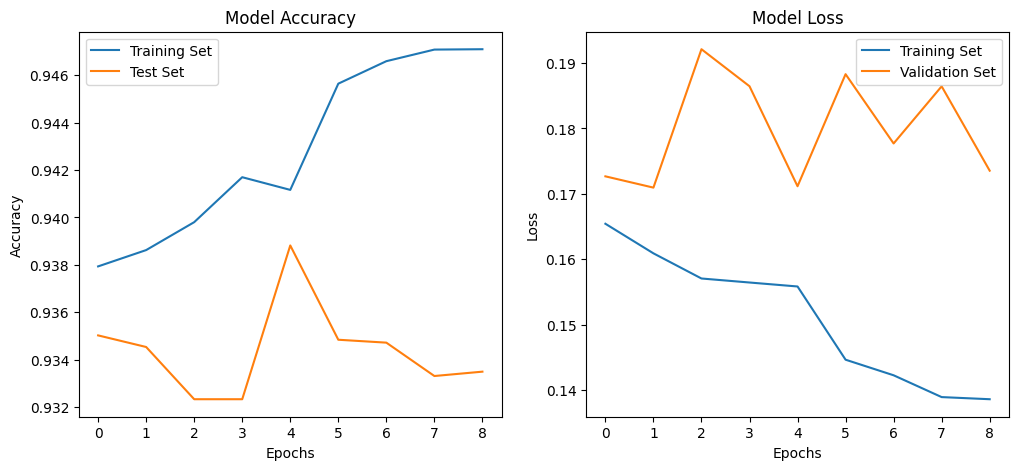

In [2]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import pickle
import seaborn as sns
import numpy as np

# Path to the saved model folder
model_path = r"D:\Davies Ningthoujam\My project\Ml Project\Driver drowsiness Detection\models"  # Replace with the actual folder path

# Load the saved model from the checkpoint
model = tf.keras.models.load_model(model_path)

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up data generators
batchsize = 8  # Adjust as needed

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=0.2, shear_range=0.2,
                                   zoom_range=0.2, width_shift_range=0.2,
                                   height_shift_range=0.2, validation_split=0.2)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    r'D:\Davies Ningthoujam\My project\Ml Project\Driver drowsiness Detection\Data\data\train',
    target_size=(80, 80),
    batch_size=batchsize,
    class_mode='categorical',
    subset='training'
)

validation_data = train_datagen.flow_from_directory(
    r'D:\Davies Ningthoujam\My project\Ml Project\Driver drowsiness Detection\Data\data\train',
    target_size=(80, 80),
    batch_size=batchsize,
    class_mode='categorical',
    subset='validation'
)

# Set up callbacks
checkpoint = ModelCheckpoint(r'D:\Davies Ningthoujam\My project\Ml Project\Driver drowsiness Detection\models',
                             monitor='val_loss', save_best_only=True, verbose=3)
earlystop = EarlyStopping(monitor='val_loss', patience=7, verbose=3, restore_best_weights=True)
learning_rate = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=3)

callbacks = [checkpoint, earlystop, learning_rate]

# Resume training
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // batchsize,
    validation_data=validation_data,
    validation_steps=validation_data.samples // batchsize,
    epochs=10,
    callbacks=callbacks
)
# Save the training history
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

print("Training complete, and history saved!")
# === Add Code to Generate Results ===

# 1. Plot Accuracy and Loss
epochs = range(len(history.history['accuracy']))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Training Set')
plt.plot(epochs, history.history['val_accuracy'], label='Test Set')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(r'D:\Davies Ningthoujam\My project\Ml Project\Driver drowsiness Detection\results\accuracy_graph.png')  # Save the graph

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Training Set')
plt.plot(epochs, history.history['val_loss'], label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(r'D:\Davies Ningthoujam\My project\Ml Project\Driver drowsiness Detection\results\loss_graph.png')  # Save the grap
